In [1]:
# Preprocess data fetched from https://figshare.com/articles/dataset/Steel_Strength_Data/7250453
# Data includes 312 steels with experimental yield strength and ultimate tensile strength, extracted and cleaned (including de-duplicating) from Citrine.
# Original source for the steel data is from Citrine: https://citrination.com/datasets/153092/

In [2]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
steels = '~/Projects/machine-learning/data/steel_strength.csv'

steels = pd.read_csv(steels, sep = ",", engine='python')

In [4]:
# add percentage of iron and drop unnecessary columns:
def find_fe(x):
    return float(x[2:7])*100

steels['fe'] = steels['formula'].apply(lambda x: find_fe(x))

# We're interested in only some elements
# Feature selection could be done with ML methods, but this is outside of the scope of this project.
steels = steels.reindex(columns=['c', 'cr', 'fe', 'al', 'ti', 'yield strength'])

# Data contains the mass-% of chemical elements and the yield strength for a given steel alloy
steels.head()

,c,cr,fe,al,ti,yield strength
0,0.02,0.01,62.0,0.15,1.55,2411.5
1,0.18,13.44,62.3,0.04,0.00,1123.1
2,0.00,8.67,62.5,0.39,0.57,1736.3
3,0.01,0.01,63.4,0.13,1.47,2487.3
4,0.01,0.01,63.6,0.13,1.55,2249.6


In [5]:
# Drop any rows, which don't contain a yield strength (i.e. where cell value is NaN)
steels.dropna(subset=['yield strength'], inplace=True)

steels.shape

(312, 6)

In [6]:
steels.describe()

,c,cr,fe,al,ti,yield strength
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,0.096442,8.043830,72.984936,0.239135,0.310897,1420.998397
std,0.109008,5.426169,5.145909,0.340110,0.556593,301.894169
min,0.000000,0.010000,62.000000,0.010000,0.000000,1005.900000
25%,0.010000,3.100000,68.500000,0.030000,0.000000,1219.475000
50%,0.030000,9.050000,72.200000,0.050000,0.030000,1344.200000
75%,0.182500,12.520000,77.125000,0.300000,0.232500,1576.075000
max,0.430000,17.500000,86.000000,1.800000,2.500000,2510.300000


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Applying scaler() to all columns
num_vars = ['c', 'cr', 'fe', 'al', 'ti', 'yield strength']
steels[num_vars] = scaler.fit_transform(steels[num_vars])

steels

,c,cr,fe,al,ti,yield strength
0,0.046512,0.000000,0.000000,0.078212,0.620,0.934326
1,0.418605,0.767867,0.012500,0.016760,0.000,0.077905
2,0.000000,0.495140,0.020833,0.212291,0.228,0.485509
3,0.023256,0.000000,0.058333,0.067039,0.588,0.984712
4,0.023256,0.000000,0.066667,0.067039,0.620,0.826708
...,...,...,...,...,...,...
307,0.883721,0.415094,0.845833,0.011173,0.000,0.476336
308,0.000000,0.293882,0.845833,0.011173,0.036,0.008708
309,0.860465,0.296741,0.854167,0.011173,0.000,0.567934
310,0.953488,0.399085,0.991667,0.011173,0.000,0.535895


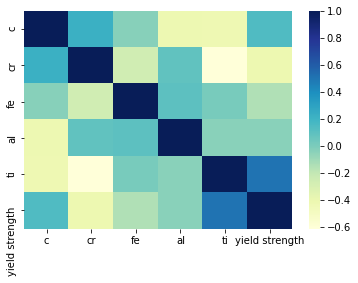

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt 

# Visualizing the data using heatmap
sns.heatmap(steels.corr(), cmap="YlGnBu", annot = False)
plt.show()

In [9]:
# Shuffle data
steels = steels.sample(frac=1.0)

steels.head()

,c,cr,fe,al,ti,yield strength
273,0.023256,0.000000,0.745833,0.039106,0.760,0.256913
3,0.023256,0.000000,0.058333,0.067039,0.588,0.984712
133,0.232558,0.696684,0.383333,0.011173,0.000,0.167708
165,0.372093,0.112064,0.470833,0.000000,0.000,0.390189
21,0.023256,0.000000,0.175000,0.122905,0.712,0.908336


In [10]:
from sklearn.model_selection import train_test_split

# We specify random seed so that the training and test data set always have the same rows, respectively
np.random.seed(0)
steels_train, steels_test = train_test_split(steels, train_size = 0.8, test_size = 0.2, random_state = 100)

steels_train, steels_val = train_test_split(steels_train, train_size = 0.7, test_size = 0.3, random_state = 100)

In [11]:
# Save training data and test data into separate files:

# steels_train.to_csv(r'~/Projects/machine-learning/data/steels_train.csv', index = False)

# steels_val.to_csv(r'~/Projects/machine-learning/data/steels_val.csv', index = False)

# steels_test.to_csv(r'~/Projects/machine-learning/data/steels_test.csv', index = False)